# Class 2: 探索式資料分析

### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data 

In [24]:
data  = pd.read_csv('/Users/kai/Desktop/train.csv')
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14


### 處理日期

In [25]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].apply(lambda x: x.year)
data['month'] = data['datetime'].apply(lambda x: x.month)
data['day'] = data['datetime'].apply(lambda x: x.day)
data['time'] = data['datetime'].apply(lambda x: x.hour)
data['weekday'] = data.datetime.dt.weekday

# 1. 觀察資料的型態、分佈

### 檢視資料型態與基本統計量

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  time        10886 non-null  int64         
 14  weekday     10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.2 MB


In [27]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,time,weekday
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


### 以長條圖（Bar Chart）檢視類別型變數的分佈

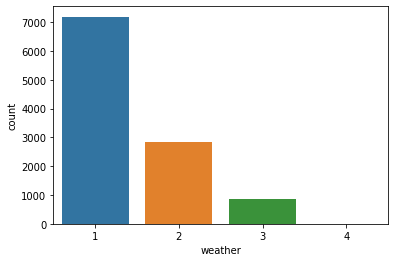

In [28]:
sns.countplot(x='weather', data=data)

/Users/kai/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


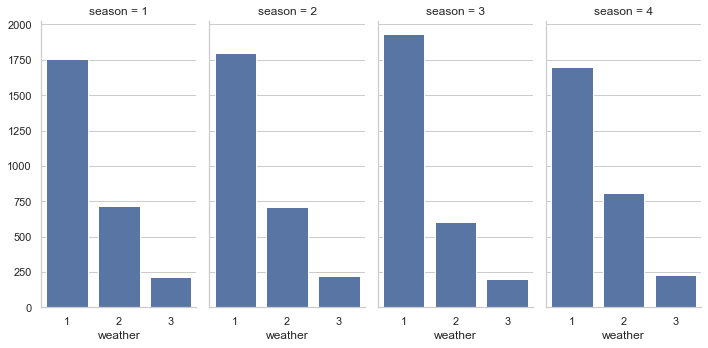

In [79]:
g = sns.FacetGrid(data, col='season', height=5, aspect=.5, margin_titles=True)
g.map(sns.countplot, 'weather')

### 以箱形圖 (Box Plot) 檢查是否有離群值 (outlier)
- 箱中間的線為中位數、箱頂為第 75 百分位數、箱底為第25百分位數
- 內四分位距(IQR)為第75百分位數與第25百分位數之間的差異，同箱子的長度
- 箱子延伸出的T-bar為內部界限值，最遠延伸至 1.5 倍 IQR
- 離群值：離箱末段 1.5 倍 IQR 到 3 倍 IQR，以・表示
- 極值：離箱末端超過 3 倍 IQR 的值，以＊表示

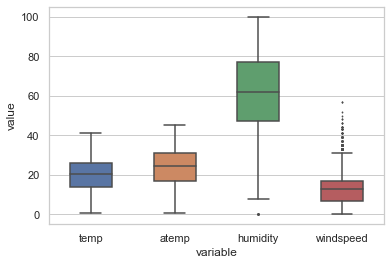

In [80]:
sns.boxplot(x='variable', y='value', data=pd.melt(data[['temp', 'atemp', 'humidity', 'windspeed']]), width=0.5, fliersize=1)

### 試著畫出 count 的箱形圖！

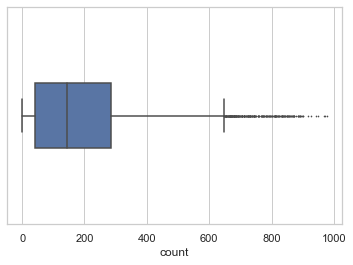

In [81]:
sns.boxplot(data['count'], width=0.3, fliersize=0.8)

### 以直方圖和密度圖觀察資料分佈

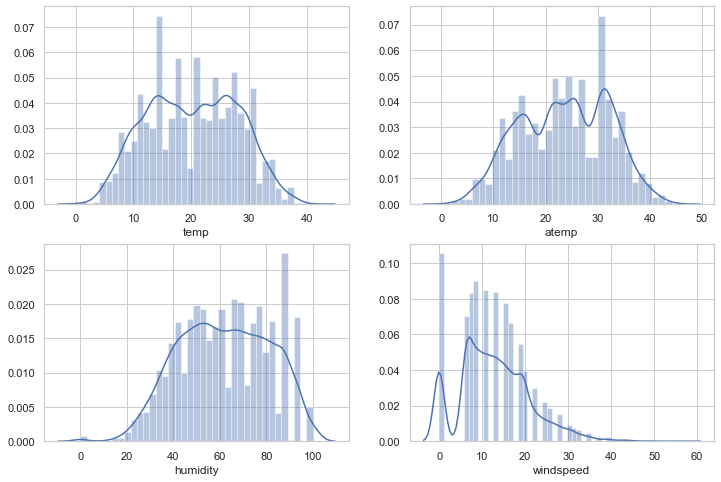

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.distplot(data['temp'], ax=ax[0][0])
sns.distplot(data['atemp'], ax=ax[0][1])
sns.distplot(data['humidity'], ax=ax[1][0])
sns.distplot(data['windspeed'], ax=ax[1][1])

### 檢視 Target Value (count) 的分佈
- 取 log 使 count 趨近常態分佈

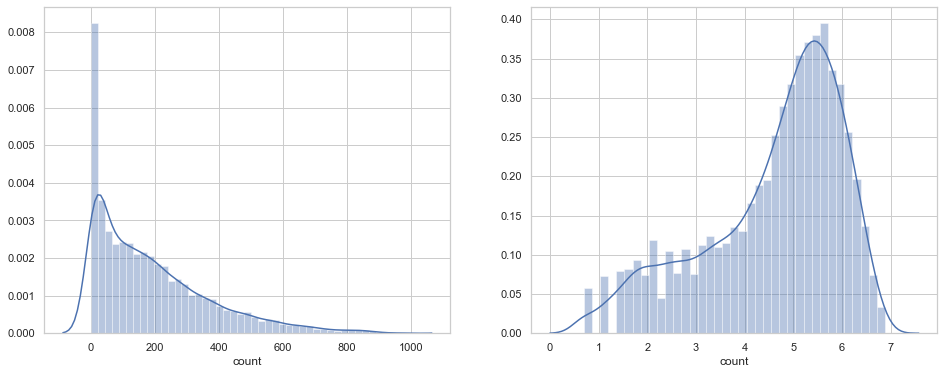

In [83]:
data['log_count'] = data['count'].apply(np.log)
fig, ax = plt.subplots(ncols=2, figsize=(16,6))
sns.distplot(data['count'], ax=ax[0])
sns.distplot(data['count'].apply(lambda x: np.log(x+1)), ax=ax[1])

In [84]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,time,weekday,log_count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553,0.161126
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832,-0.000435
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267,-0.018126
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692,-0.106078
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466,0.373913
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235,0.369587
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507,-0.327998
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804,0.120310
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601,-0.002283,0.805773
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234,-0.003785,0.175105


# 2. 觀察變數間的關係
- 先看一下相關係數
- 沒想法的話就先從「目標變數」+ 「隨便選個特徵」開始吧！


### 檢視相關係數，以熱點圖（Heatmap）呈現
#### sns.heatmap 參數設定
- annot (bool) 如為True，顯示數值
- ax (matplotlib Axes) 選擇要畫在哪張圖（軸）中

In [85]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day',
       'time', 'weekday', 'log_count'],
      dtype='object')

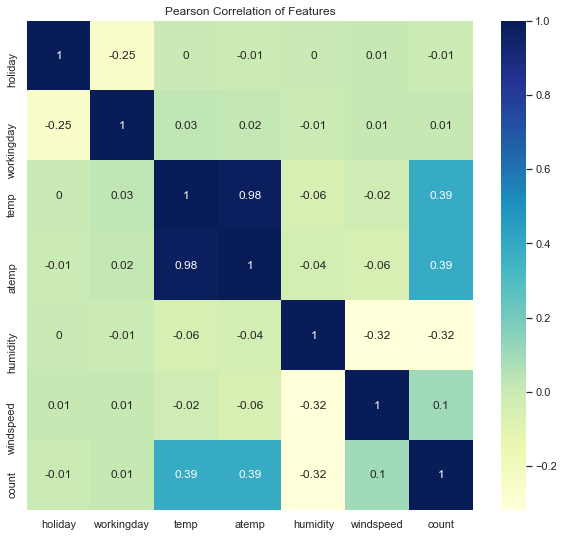

In [86]:
corr_data = data[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count']]
fig, ax = plt.subplots(figsize=(10,9))
ax.set_title('Pearson Correlation of Features')
sns.heatmap(corr_data.corr().round(2), annot=True, ax=ax, cmap='YlGnBu')

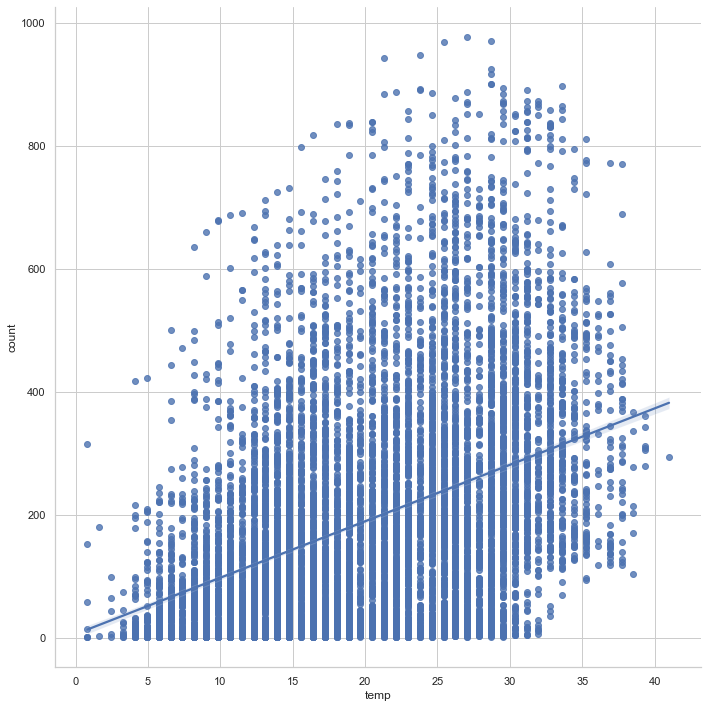

In [87]:
sns.lmplot(x='temp', y='count', data=data, height=10, fit_reg=True)

# 3. 發現潛在的模式

### 觀察 count 與 weekday、time 的關係

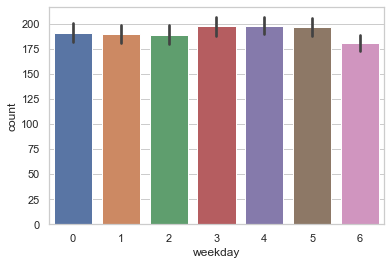

In [46]:
sns.set(style='whitegrid')
sns.barplot(x='weekday', y='count', data=data)

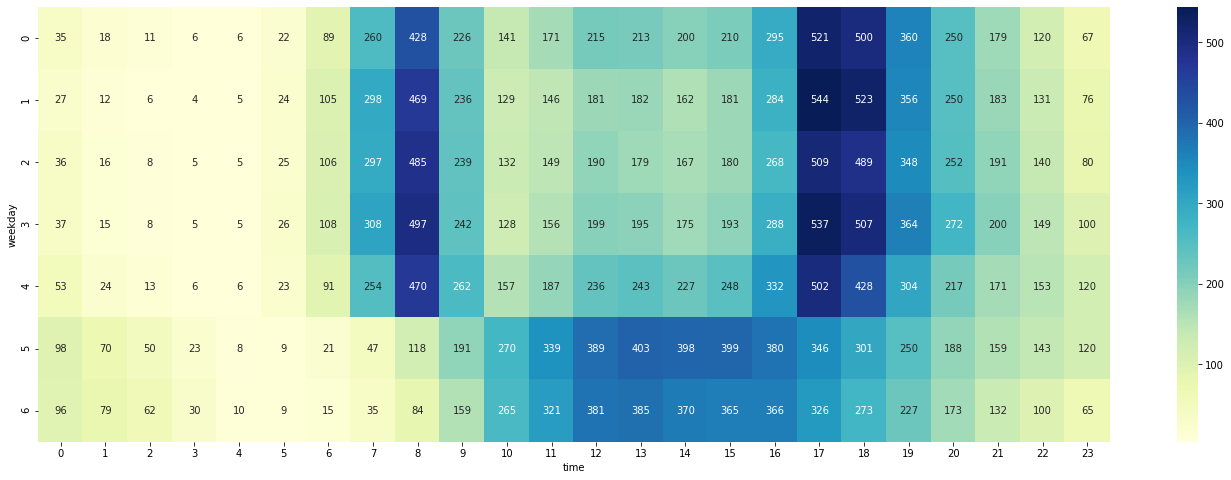

In [44]:
fig, ax = plt.subplots(figsize=(24,8))
sns.heatmap(data.groupby(['time', 'weekday'])['count'].mean().round(0).unstack(0), annot=True, fmt='g', cmap='YlGnBu')

# 4. 發揮你的好奇心，玩玩看吧！
https://seaborn.pydata.org/examples/index.html